<a href="https://colab.research.google.com/github/AliBavarchee/LatentBoostClassifier/blob/main/HybridModelDemoNotebook_magic04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

====================================<p align="Center">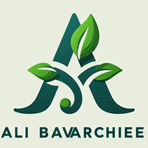</p>====================================
====
| https://github.com/AliBavarchee/ |
----

----

-----
# Hybrid Generative Model Demo: Training and Visualization of a CVAE+CGAN+RF Hybrid Model
-----

-<p align="Center">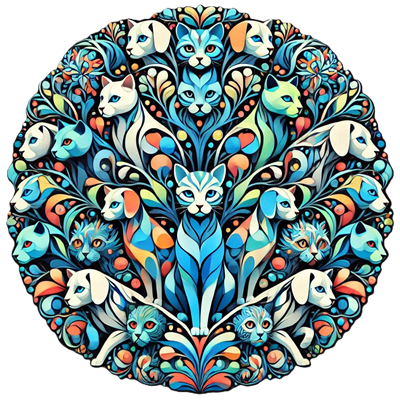</p>-

|https://github.com/AliBavarchee/LatentBoostClassifier|

# Download and Insert magic04.data


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

--2024-12-22 13:11:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic04.data’

magic04.data            [  <=>               ]   1.41M  4.08MB/s    in 0.3s    

2024-12-22 13:11:15 (4.08 MB/s) - ‘magic04.data’ saved [1477391]



In [ ]:
import pandas as pd
import numpy as np
import math
features = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data',delimiter=',',names = features)

# Add a column with a binary value "label" that is more suitable to be used by a classifier
df['label'] = pd.Series(np.zeros(len(df)), index=df.index, dtype=int)
df.loc[df['class'] == 'g', 'label'] = 1
df.loc[df['class'] == 'h', 'label'] = 0
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g,1


# Split the data into training and testing sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def transform_split(X,Y):
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    Y = Y[permutation]

    # train-test splitting
    train_size = 0.8
    train_len = int(train_size * X.shape[0])

    X_train, X_test = X[:train_len], X[train_len:]
    Y_train, Y_test = Y[:train_len], Y[train_len:]

    # scaling data
    transformer = MinMaxScaler(feature_range=(-1, 1), copy=True)
    transformer.fit(X_train)
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)

    return X_train, Y_train, X_test, Y_test

In [ ]:
# defining features matrix X and labels vector y
X = np.array(df.iloc[:,0:10])
Y = np.array(df.iloc[:,11])
X_train, Y_train, X_test, Y_test = transform_split(X,Y)

# Install the LatentBoostClassifier package directly from the GitHub repository

In [ ]:
pip install git+https://github.com/AliBavarchee/LatentBoostClassifier.git

  Cloning https://github.com/AliBavarchee/LatentBoostClassifier.git to /tmp/pip-req-build-h7icz_p9
  Running command git clone --filter=blob:none --quiet https://github.com/AliBavarchee/LatentBoostClassifier.git /tmp/pip-req-build-h7icz_p9
  Resolved https://github.com/AliBavarchee/LatentBoostClassifier.git to commit adc5f862a25a1b85ee906dcb76b707a06c606606
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00
  Created wheel for LatentBoostClassifier: filename=LatentBoostClassifier-1.2.3-py3-none-any.whl size=409731 sha256=6e81c4bd98285edb89b6b18597f13304b6fd6c06077dd5ed1e1ba8980004514c
  Stored in directory: /tmp/pip-ephem-wheel-cache-i9zj8opm/wheels/64/f5/e8/224c5eea81ef454b5b7d52cafd2ce903261be16cfc7b4ba920
Successfully built LatentBoostClassifier


# Import the core functions from the LatentBoostClassifier package

In [ ]:
from LatentBoostClassifier import parallel_train, visualize_hybrid_model

# Verify the installation details of the LatentBoostClassifier package

In [ ]:
!pip show LatentBoostClassifier

Name: LatentBoostClassifier
Version: 1.2.3
Summary: A hybrid generative model combining CVAE, CGAN, and Random Forest.
Home-page: https://github.com/AliBavarchee/LatentBoostClassifier
Author: Ali Bavarchee
Author-email: ali.bavarchee@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras-tuner, matplotlib, numpy, pandas, scikit-learn, seaborn, tensorflow, tqdm
Required-by: 


# Train the hybrid model (CVAE, CGAN, and Random Forest) in parallel
The function returns the trained CVAE model, CGAN generator, and Random Forest model
====

Trial 90 Complete [00h 01m 12s]
loss: 0.26910287141799927

Best loss So Far: 0.2690928280353546
Total elapsed time: 01h 03m 56s
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2646
           1       0.65      1.00      0.79      4962

    accuracy                           0.65      7608
   macro avg       0.83      0.50      0.40      7608
weighted avg       0.77      0.65      0.52      7608

Confusion Matrix:
[[   2 2644]
 [   0 4962]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


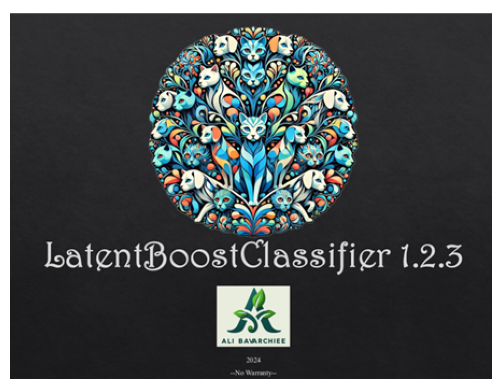

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
best_cvae, best_cgan_generator, best_rf_model = parallel_train(X_train, Y_train, X_test, Y_test)

# Visualize the results of the hybrid model, including:
 - Latent space visualization
 ===
 - Synthetic data comparison
 ===
 - Classification performance metrics
 ===

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.00      0.01      2646
           1       0.65      0.99      0.79      4962

    accuracy                           0.65      7608
   macro avg       0.44      0.50      0.40      7608
weighted avg       0.50      0.65      0.52      7608

Confusion Matrix:


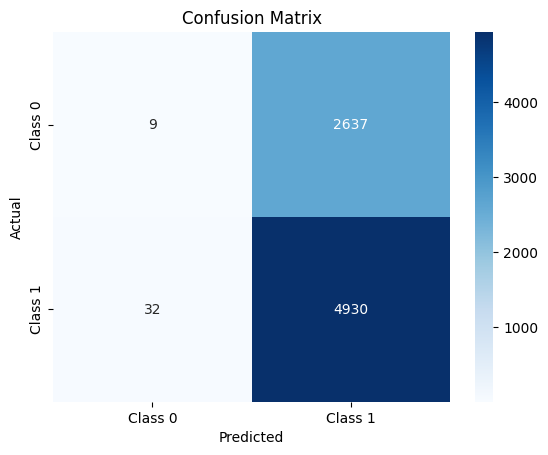

357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


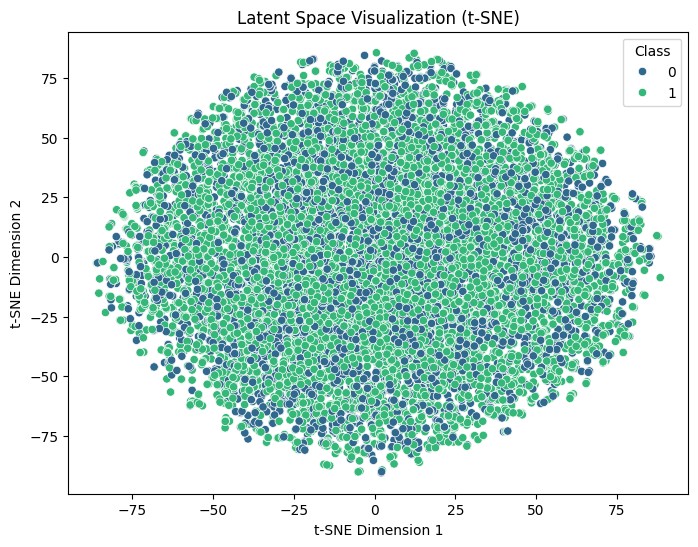

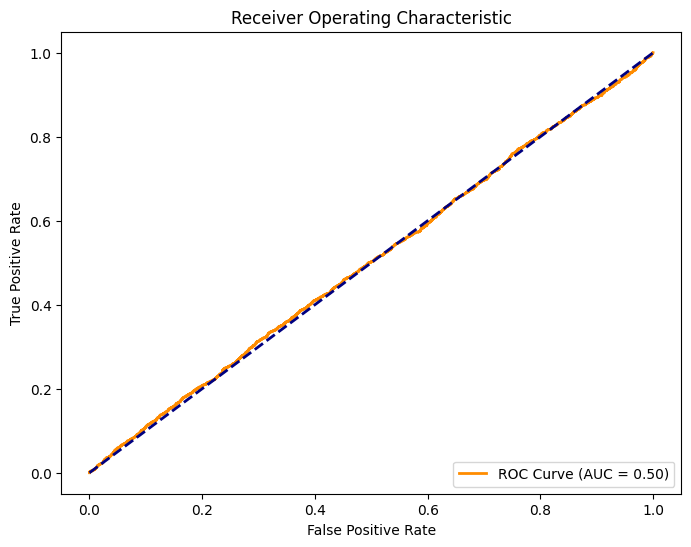

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


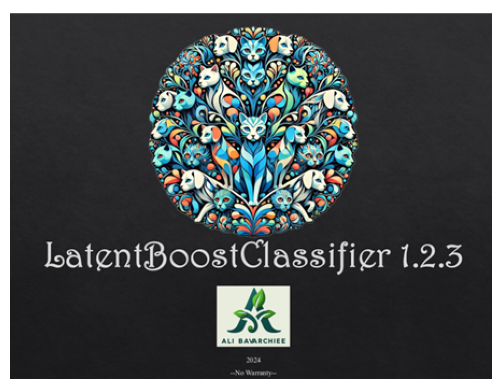

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
visualize_hybrid_model(best_cvae, best_cgan_generator, best_rf_model, X_test, Y_test, X_train, Y_train)

# Visualization of the models

## CVAE Architecture

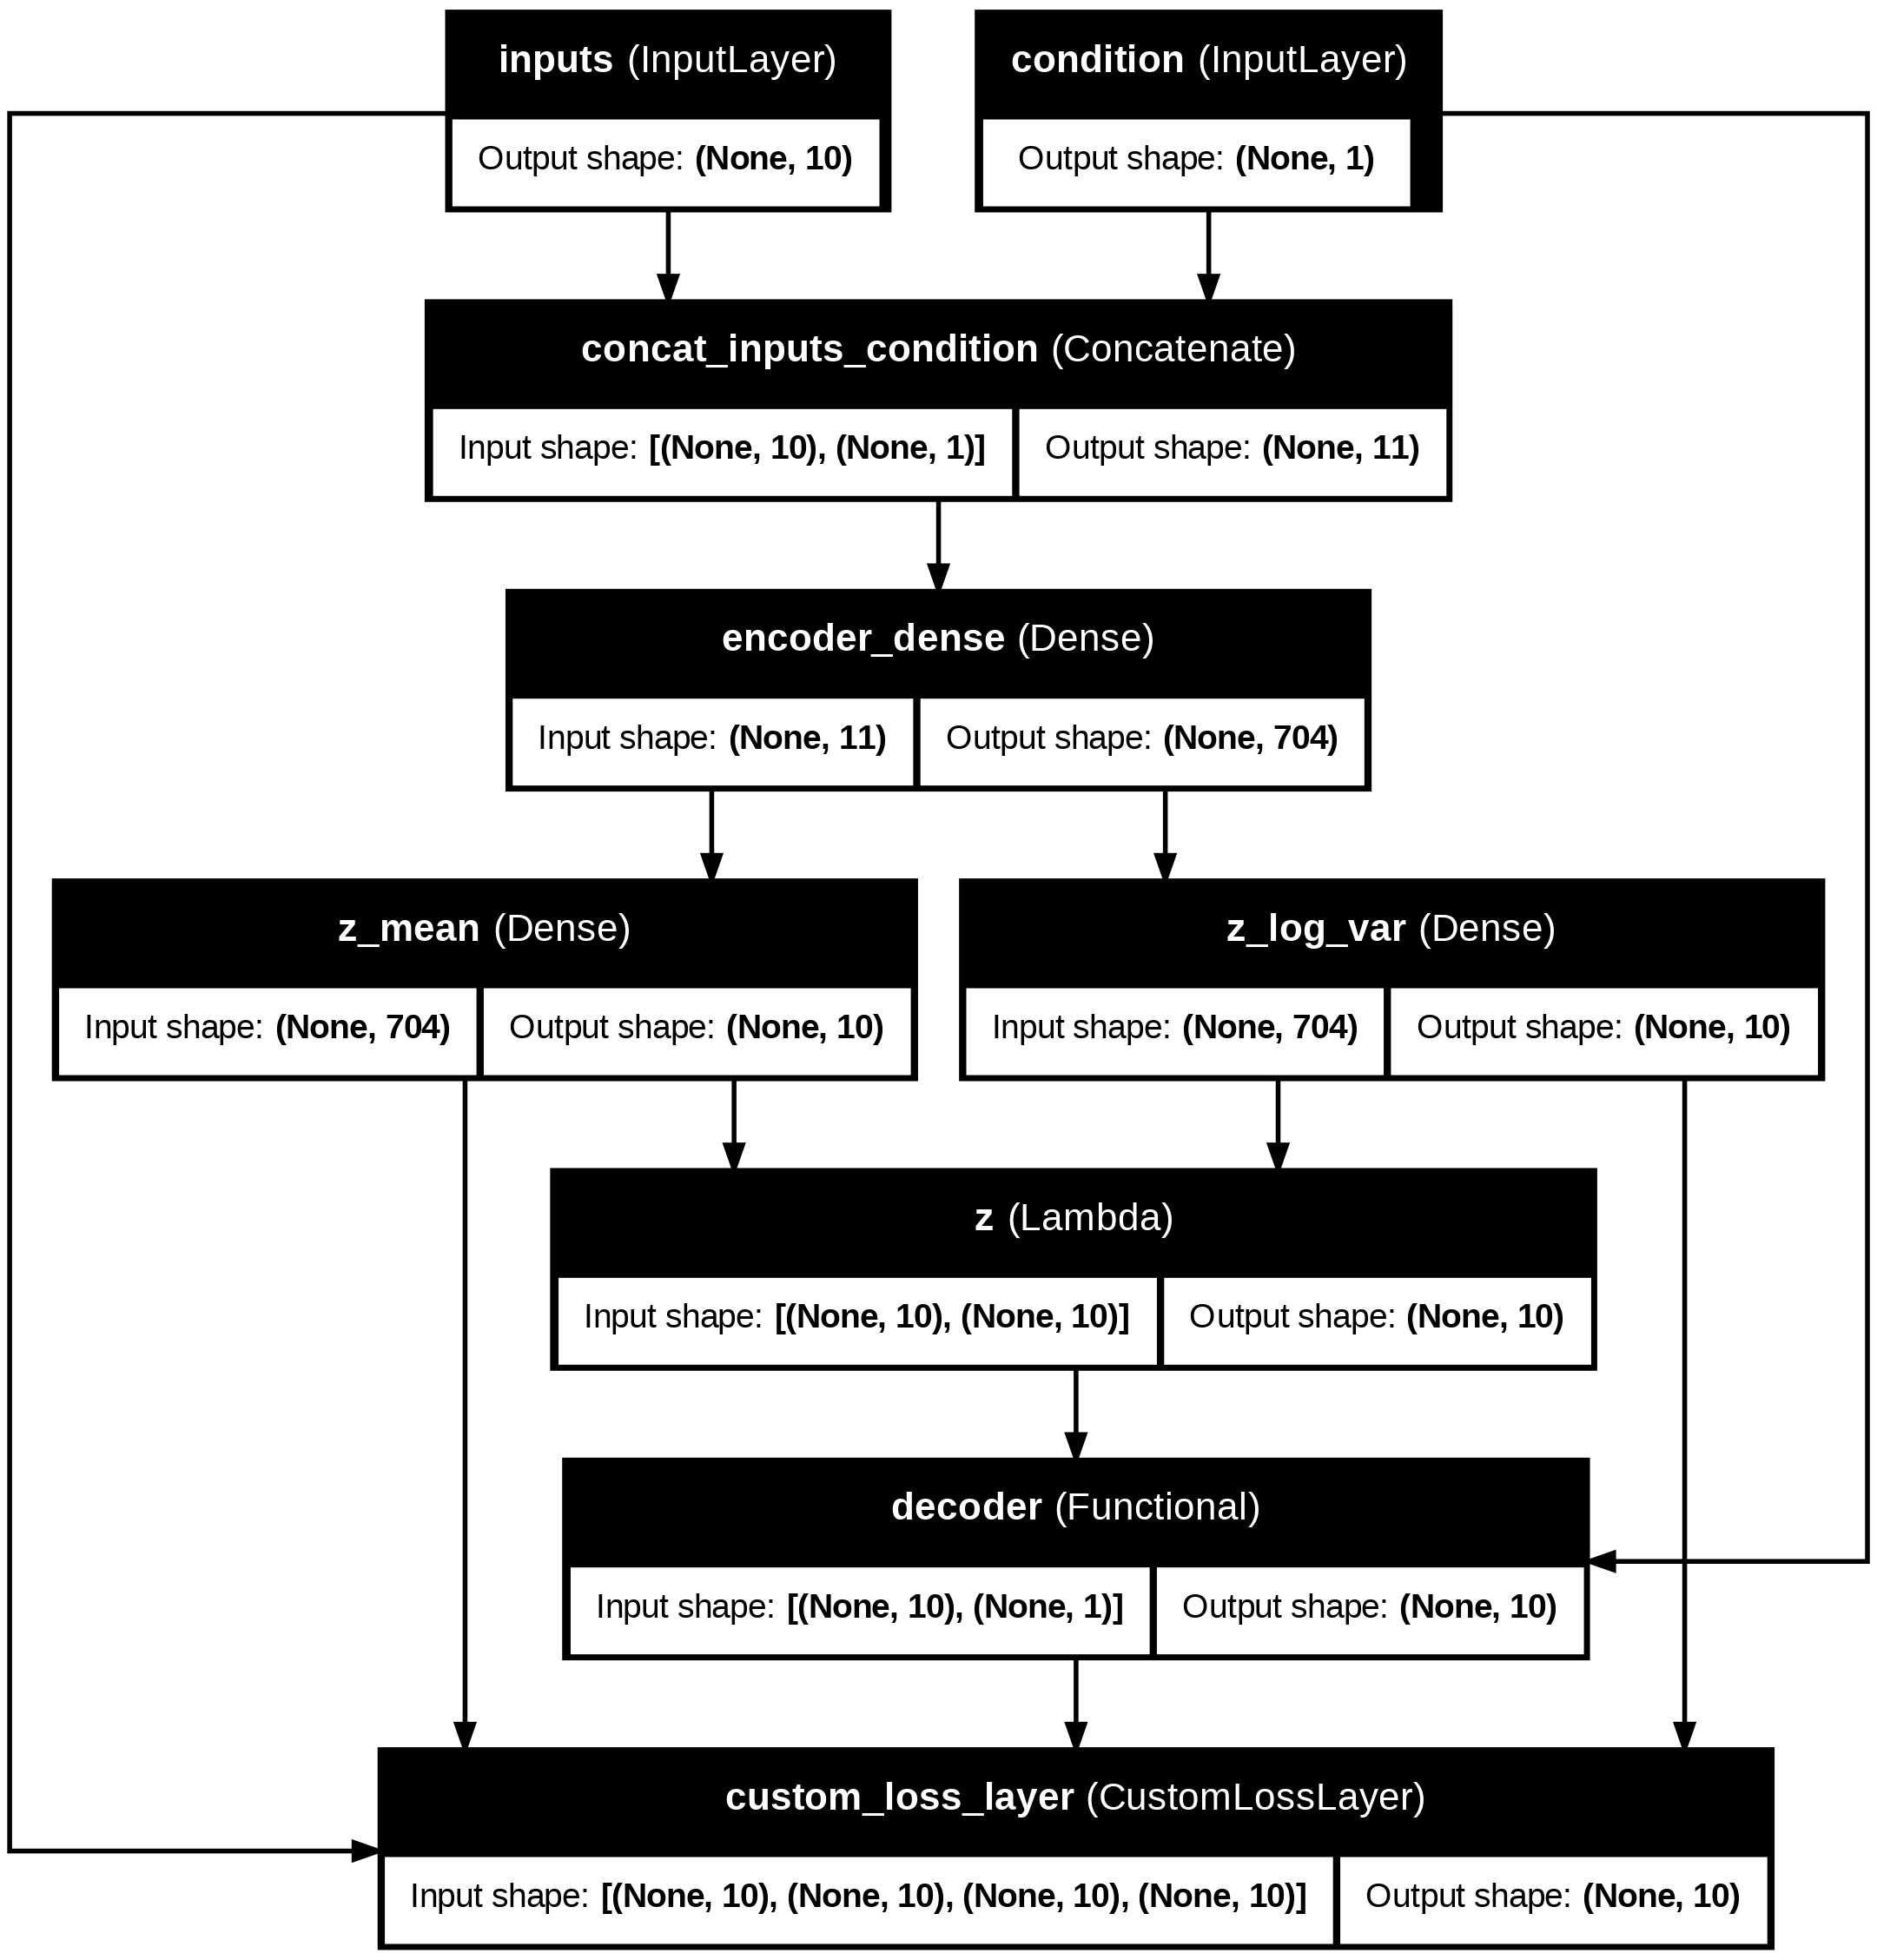

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize CVAE
plot_model(best_cvae, to_file="cvae_architecture.png", show_shapes=True, show_layer_names=True)
plot_model(best_cvae, to_file="cvae_architecture.pdf", show_shapes=True, show_layer_names=True)


## CGAN Architecture

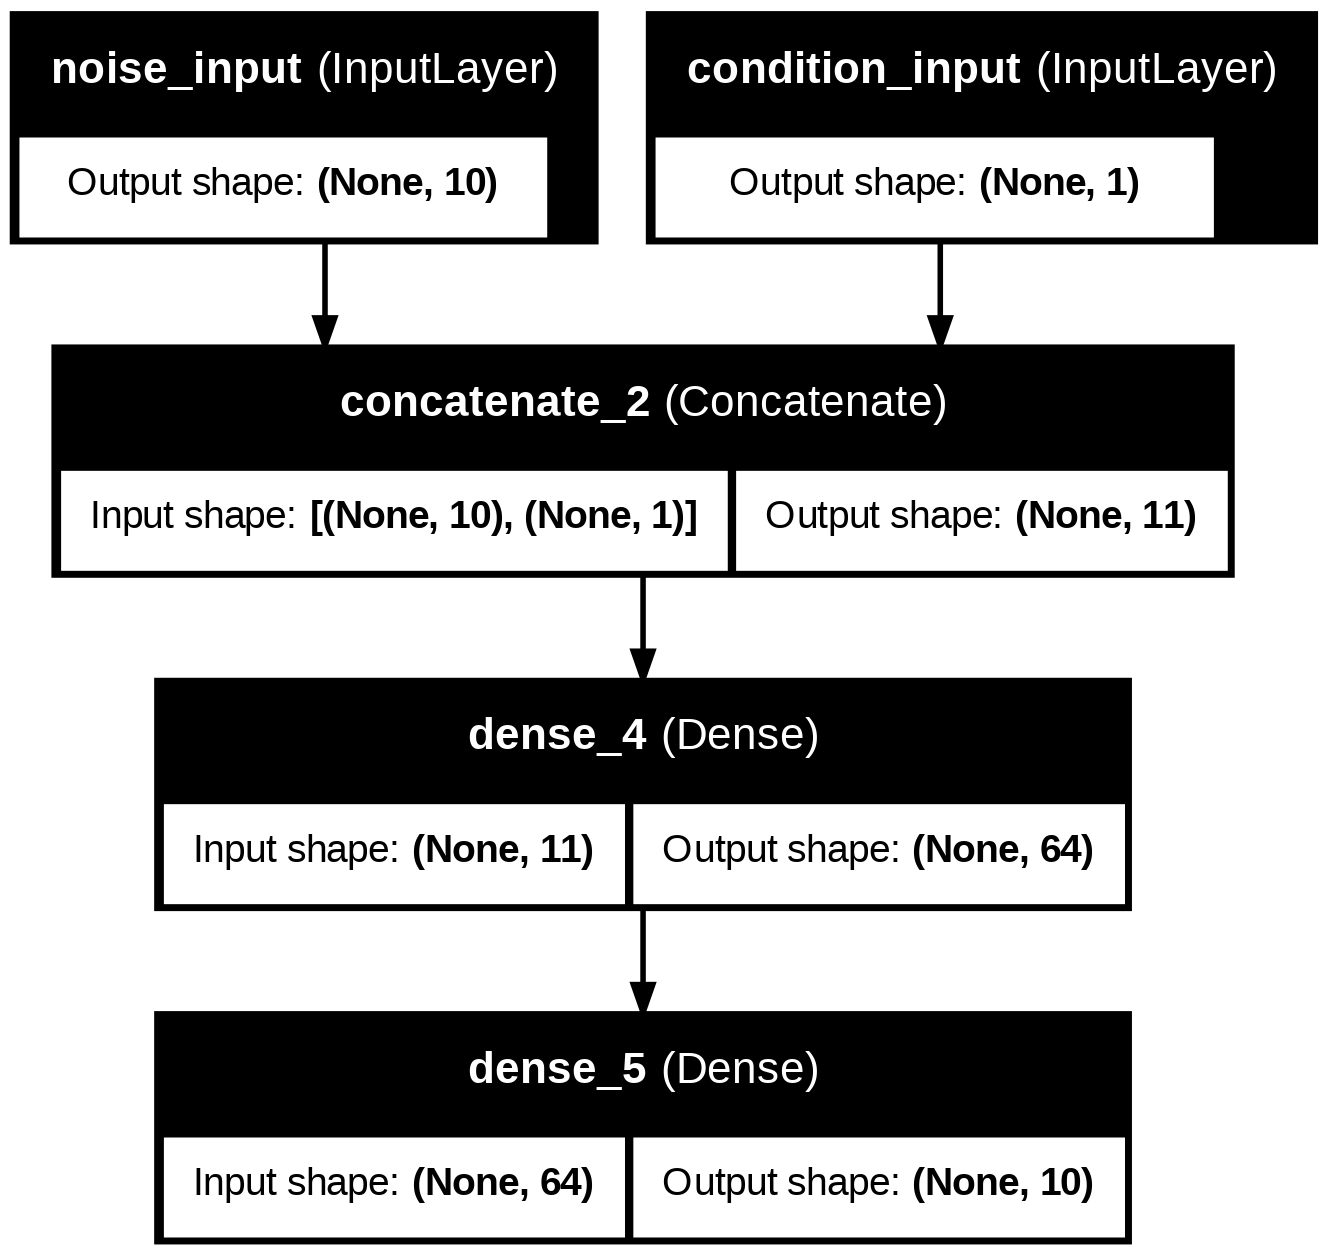

In [ ]:
# Visualize CGAN Generator
plot_model(best_cgan_generator, to_file="cgan_generator_architecture.png", show_shapes=True, show_layer_names=True)
plot_model(best_cgan_generator, to_file="cgan_generator_architecture.pdf", show_shapes=True, show_layer_names=True)


## RF Architecture

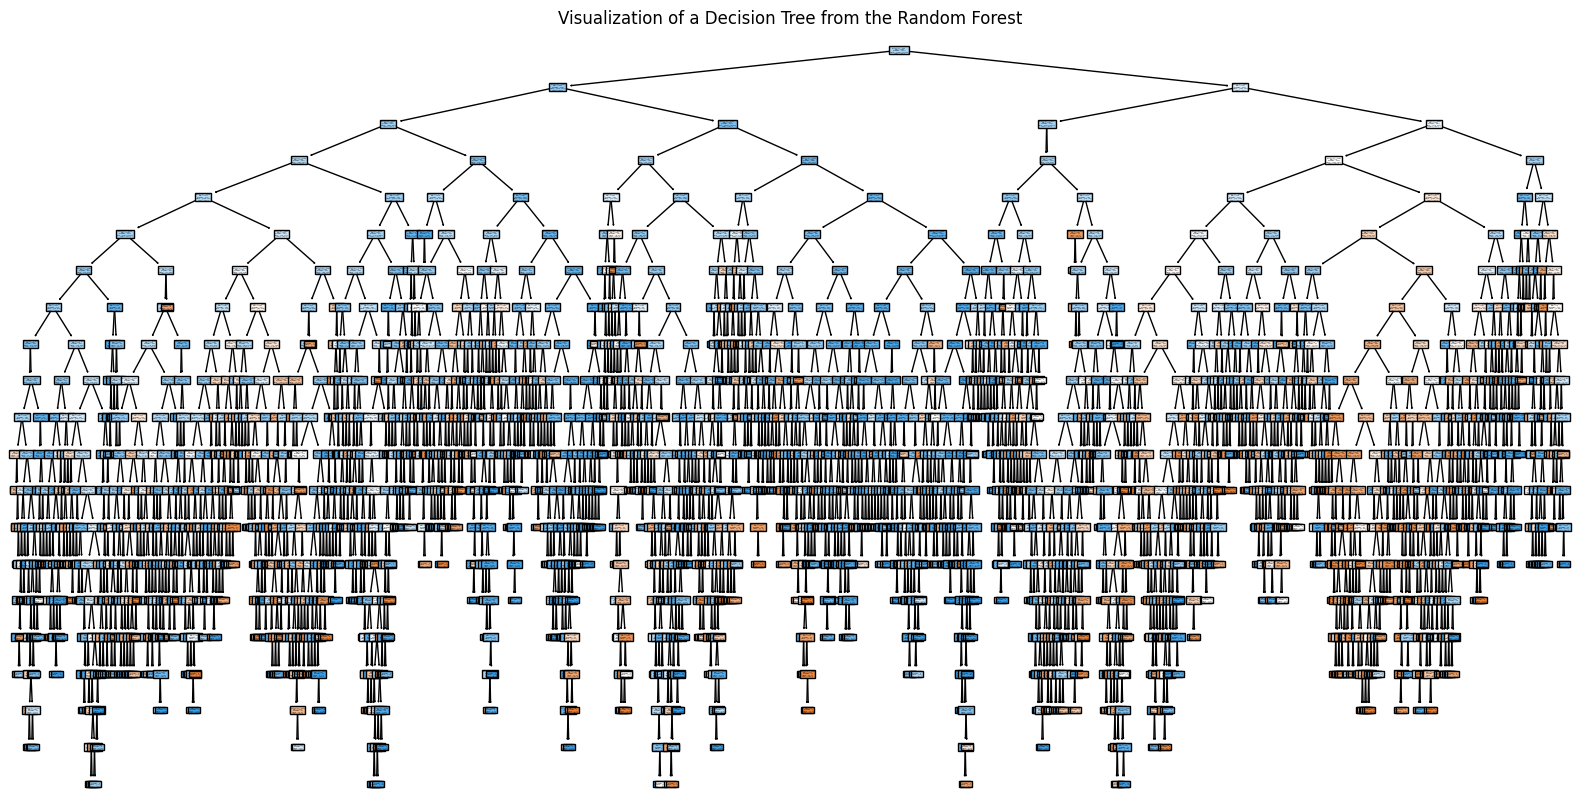

|--- Feature 4 <= 0.52
|   |--- Feature 6 <= 0.49
|   |   |--- Feature 5 <= 0.57
|   |   |   |--- Feature 9 <= 0.64
|   |   |   |   |--- Feature 9 <= 0.11
|   |   |   |   |   |--- Feature 7 <= 0.22
|   |   |   |   |   |   |--- Feature 1 <= 1.37
|   |   |   |   |   |   |   |--- Feature 1 <= -0.46
|   |   |   |   |   |   |   |   |--- Feature 0 <= -1.46
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Feature 0 >  -1.46
|   |   |   |   |   |   |   |   |   |--- Feature 0 <= 0.82
|   |   |   |   |   |   |   |   |   |   |--- Feature 3 <= -0.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Feature 3 >  -0.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- Feature 0 >  0.82
|   |   |   |   |   |   |   |   |   |   |--- Feature 5 <= -1.54
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |  

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# Extract one decision tree from the Random Forest
decision_tree = best_rf_model.estimators_[0]  # First tree in the forest

# Determine the number of features expected by the tree
n_features = decision_tree.n_features_in_

# Generate feature names (update this to match your actual feature names if available)
feature_names = [f"Feature {i}" for i in range(n_features)]

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(decision_tree, feature_names=feature_names,
          class_names=["Class 0", "Class 1"], filled=True)
plt.title("Visualization of a Decision Tree from the Random Forest")
plt.show()

# Export the text representation of the decision tree
tree_text = export_text(decision_tree, feature_names=feature_names)
print(tree_text)


In [ ]:
# Visualize one of the trees in the Random Forest
tree = best_rf_model.estimators_[0]  # Access the first tree
dot_data = export_graphviz(tree, out_file=None, feature_names=[f"Feature {i}" for i in range(n_features)],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Saves as 'random_forest_tree.pdf'


'random_forest_tree.pdf'

# Schamatic of Hybrid Generative Model

In [ ]:
from graphviz import Digraph

dot = Digraph(comment="Hybrid Model Architecture")
dot.node("Input", "Input Data")
dot.node("CVAE", "Conditional Variational Autoencoder (CVAE)")
dot.node("CGAN", "Conditional GAN Generator (CGAN)")
dot.node("RF", "Random Forest Classifier")

# Connect nodes
dot.edges([("Input", "CVAE"), ("Input", "CGAN"), ("CVAE", "RF"), ("CGAN", "RF")])

# Save and render the diagram
dot.render("hybrid_model_architecture", format="pdf", cleanup=True)


'hybrid_model_architecture.pdf'

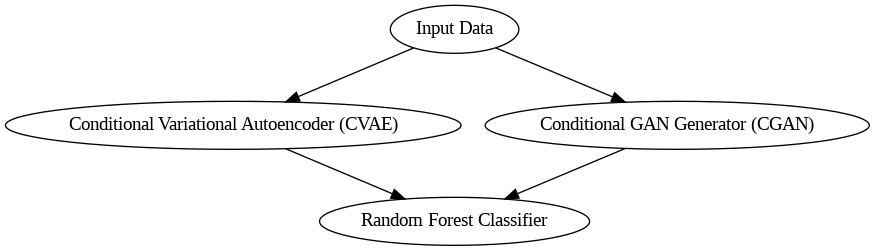